# Traffic model research

In [1]:
from src import traffic_model as model
from joblib import Parallel, delayed
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt

## Research human drive vehicle

In [2]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

### Single line

__Test__

In [3]:
road_param = {
    "N_cells": 1000,
    "N_lane": 1,
}
cars = {model.HumanDriveVehicle: 500}

In [4]:
model_1 = model.Model(road_parametrs=road_param, vehicles=cars)

In [5]:
%%time
model_1.model_stabilization(2000)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at E:\PROGRAMMING PROJECT\Python project\CellularAutomata\TrafficModel\src\traffic_model.py (165)[0m
[1m
File "src\traffic_model.py", line 165:[0m
[1m    def step(self: py_object):
        <source elided>
        """   
[1m        num_change: int = 0
[0m        [1m^[0m[0m 

This error may have been caused by the following argument(s):
- argument 0: [1mCannot determine Numba type of <class 'src.traffic_model.Model'>[0m


In [ ]:
%%time
model_1.model_stabilization(2000)

In [ ]:
model_1.model_research(100)

In [ ]:
model_1.result

__Fundamential diagramm__

In [ ]:
core = joblib.cpu_count() - 2
cars_arr = np.arange(1000, step=50)[1:]
cars_arr

In [ ]:
def step(cars):
    road_param = {
        "N_cells": 1000,
        "N_lane": 1,
    }
    cars = {model.HumanDriveVehicle: cars}
    road = model.Model(road_parametrs=road_param, vehicles=cars)
    road.model_stabilization(1000)
    road.model_research(100)
    return road.result

In [ ]:
%%time
tabel_result = Parallel(n_jobs=core, verbose=10)(delayed(step)(cars) for cars in cars_arr)

In [ ]:
result = pd.DataFrame(tabel_result)
result

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16

fig = plt.figure(figsize=(10,6), dpi=300)

label = "$p_{slow} = $"+str(0.5)
plt.plot(result['rho'], result['flow'], label=label)

plt.ylim(0,0.6)
plt.xlim(0,1)
plt.legend(loc='upper right', fontsize=fs)
plt.xlabel(r'Density [Vehicle/cell]',  fontsize = fs)
plt.ylabel(r'Flow [Vechicle/time step]',  fontsize = fs)
plt.title(r'NaSch model with different probability to slow', fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()

__Visualization__

In [32]:
road_param = {
    "N_cells": 100,
    "N_lane": 1,
}
cars = {model.HumanDriveVehicle: 50}

In [37]:
model_vis = model.Model(road_parametrs=road_param, vehicles=cars)

In [38]:
%%time
model_vis.model_stabilization(1000)

CPU times: total: 5.64 s
Wall time: 5.64 s


In [17]:
model_vis.model_research(200, is_diagramm=True)

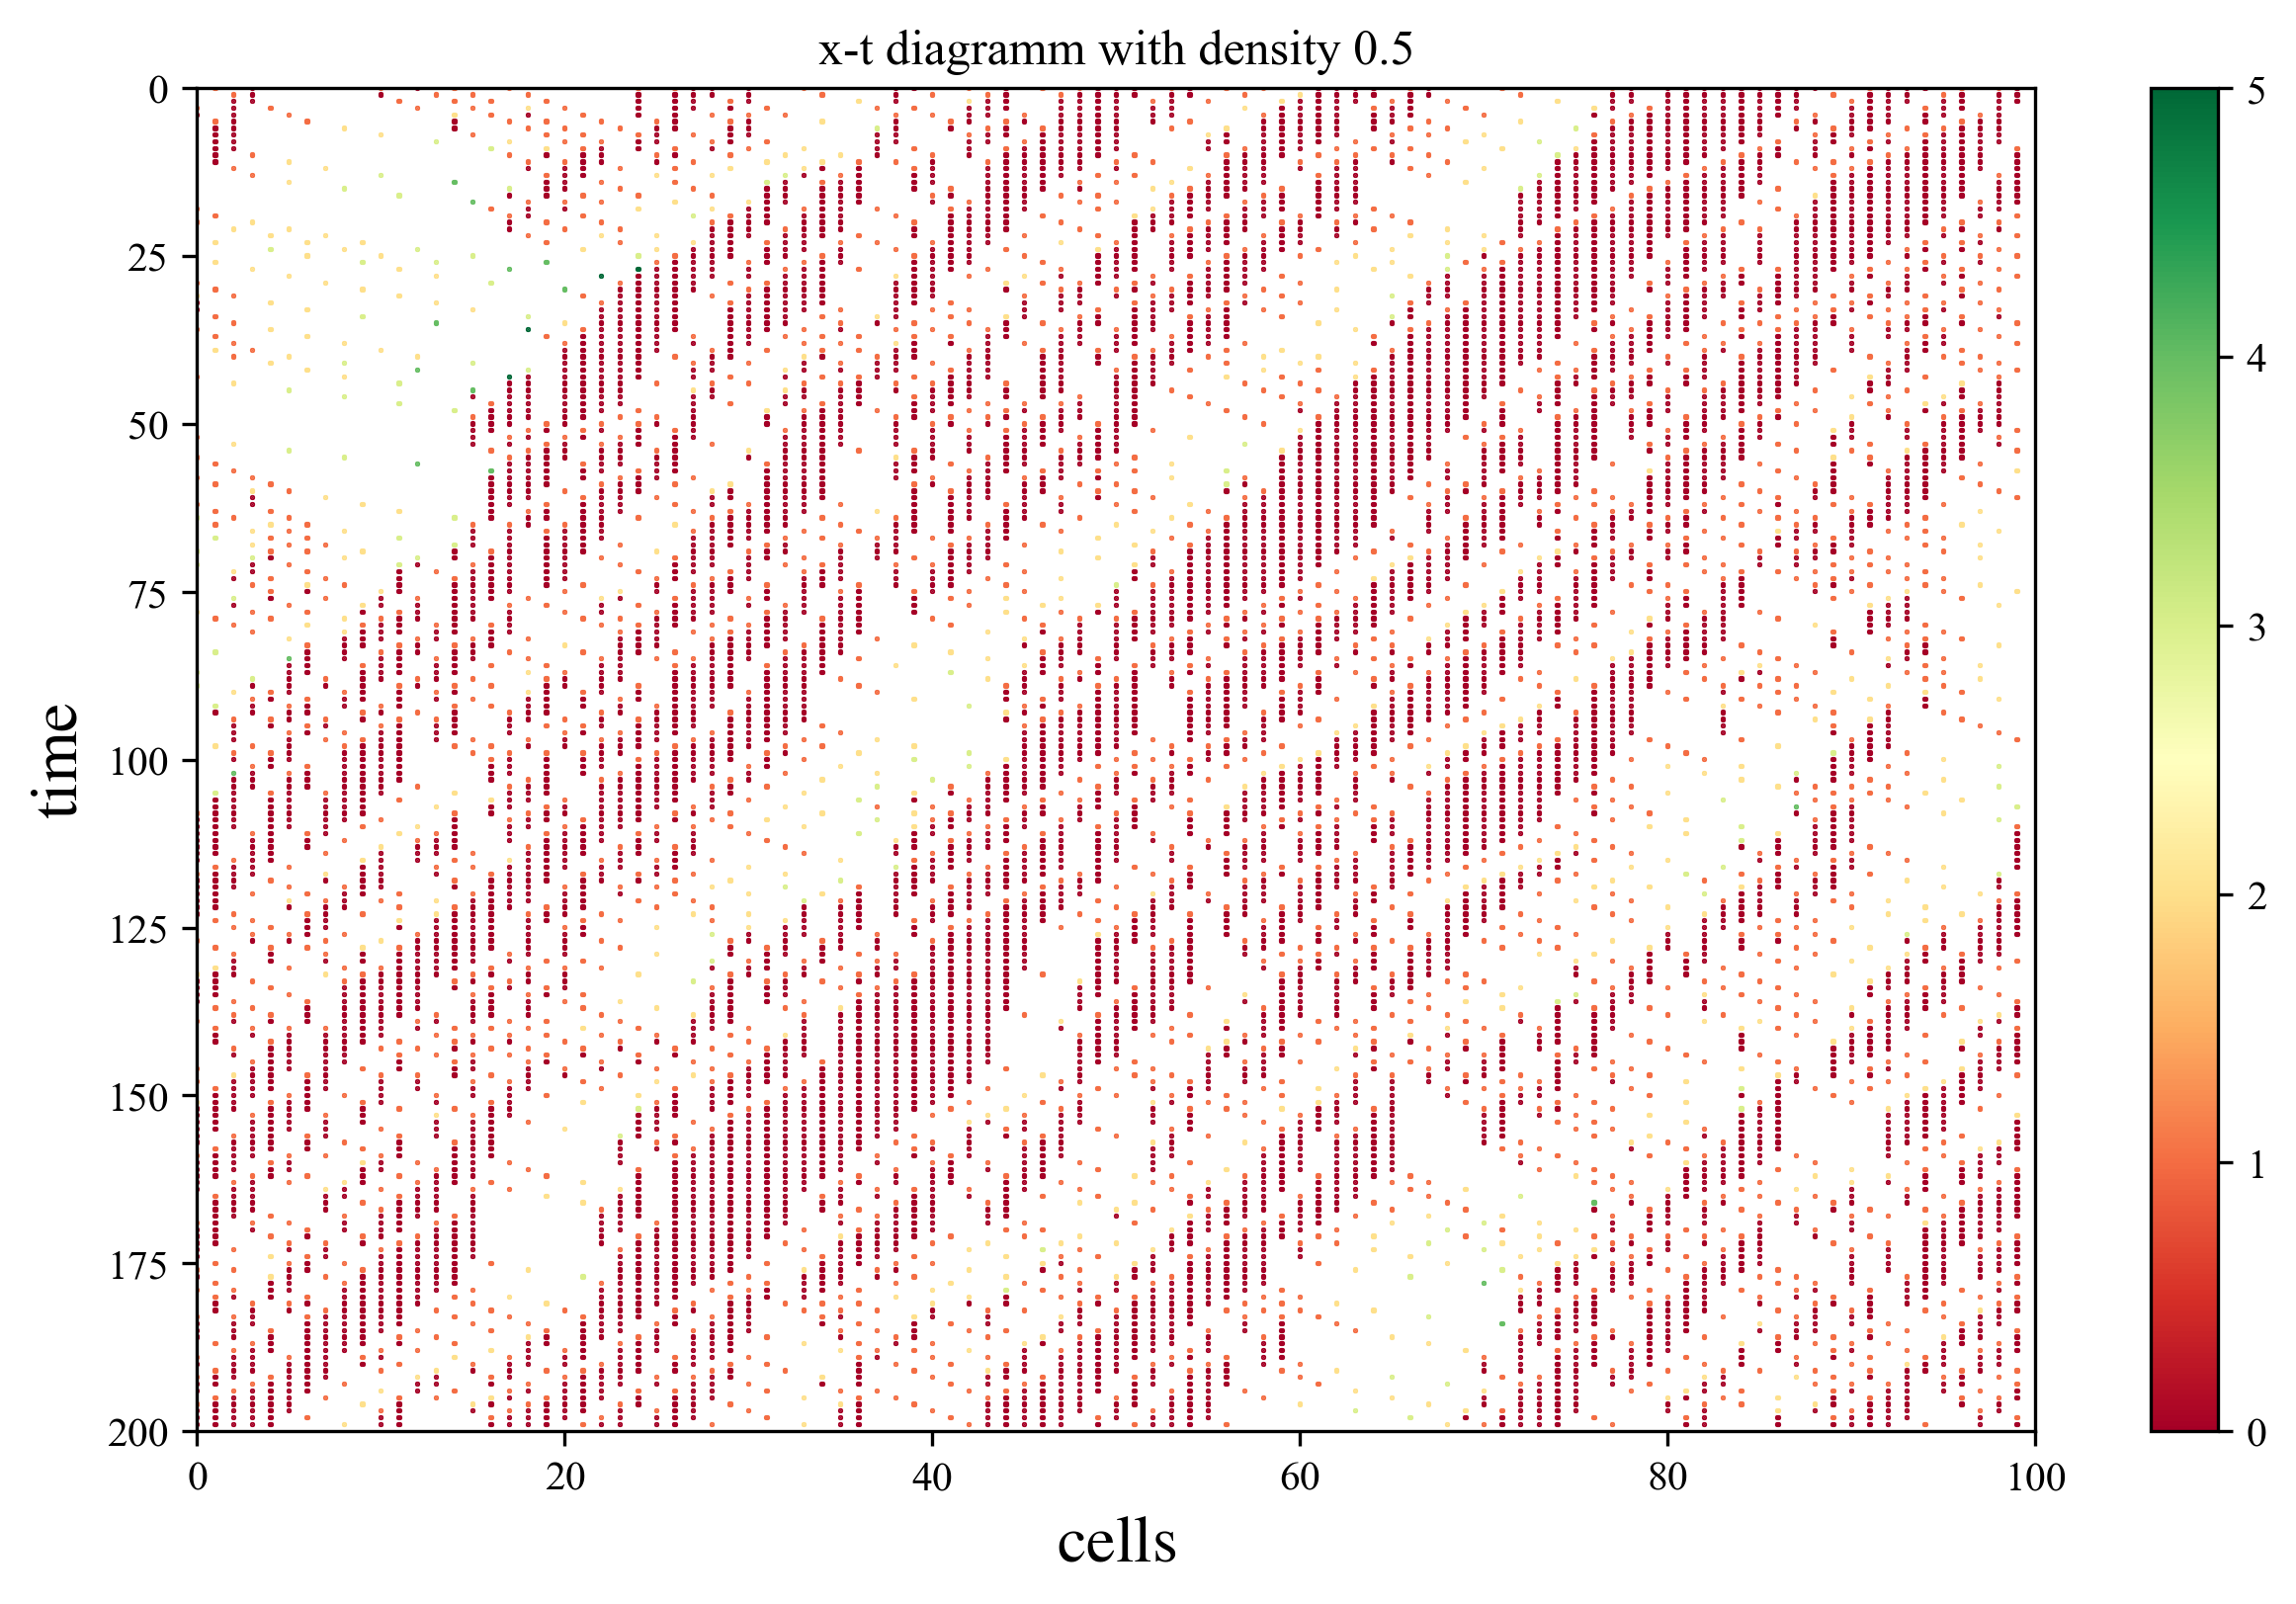

In [18]:
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16


fig = plt.figure(figsize=(10,6), dpi=300)

time = np.linspace(0, layers.shape[0]-1, layers.shape[0], dtype=int)
cells = np.linspace(0, layers.shape[1]-1, layers.shape[1], dtype=int)
grid = np.meshgrid(cells, time, indexing='xy')

#plt.scatter(grid[0], grid[1], marker='s', c='grey', s=1, alpha=0.2)
#bar_pic=plt.scatter(grid[0], grid[1], marker ='s', c = road_map, cmap = 'RdYlGn', s = 4, alpha = 1, edgecolors='black', linewidths=0.5 )
bar_pic=plt.scatter(grid[0], grid[1], marker ='s', c = layers, cmap = 'RdYlGn', s = 0.1, alpha = 1 )
plt.xlim(0, layers.shape[1])
plt.ylim(0, layers.shape[0])
plt.gca().invert_yaxis()
plt.colorbar()
plt.clim(0, 5)
plt.title(f"x-t diagramm with density {model_vis.result['rho']}")
plt.xlabel(r'$\mathrm{cells}$',  fontsize = fs)
plt.ylabel(r'$\mathrm{time}$',  fontsize = fs)
#plt.grid(linewidth=0.5)
plt.show()
#fig.savefig(f'data/x_t_{density}.jpg', dpi = 200, pad_inches=0.1, format='jpg', bbox_inches='tight')

__Three line__

In [ ]:
road_param = {
    "N_cells": 1000,
    "N_lane": 3,
}
cars = {model.HumanDriveVehicle: 600}

In [ ]:
model_3 = model.Model(road_parametrs=road_param, vehicles=cars)

In [ ]:
%%time
model_3.model_stabilization(1000)

In [ ]:
model_3.model_research(100)

In [ ]:
model_3.result